## Trabalho 1: Aprendizado de Máquina
### Modelo de aprendizado supervisionado escolhodo
Alunos: 

Fernando Rezende Zagatti RA: 11415770

Maiser Jose Alves Oliva RA: 327042

Otavio Cesar Toma da Silva RA: 726576

Theodosio Banevicius RA: 619825

#### Foi escolhido um dataset para testar a qualidade do vinho (0 à 10) a partir de suas características. Inicialmente foi importado todas as bibliotecas que seriam utilizadas. 

In [2]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
dataset = pd.read_csv('winequalityN.csv') #Importando o dataset

#### Mostrando a cabeça do dataset, provando que foi importado corretamente:

In [3]:
dataset.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#### Fazendo uma descrição rápida de cada atributo:

In [4]:
dataset.describe()    #Descreve o dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


#### O primeiro contratempo identificado no dataset foi a presença de informações faltantes (nula). 

In [5]:
dataset.isnull().sum()   #Verifica valores faltantes (nulos)

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

#### O segundo contratempo foi a normalização na coluna "type", que foi tratada imediatamente.

In [6]:
transform = {"type": {"white": 1, "red": 2}}    #Transforma as strings da coluna type em números
dataset.replace(transform, inplace=True)
dataset.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#### Logo em seguida foi tratado os valores nulos. Como o dataset possuia muitas amostras (6496) e haviam poucas colunas com valores faltantes, foi apenas excluído a linha.

In [7]:
dataset.dropna(inplace=True)   #Exclui valores nulos
dataset.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### Mostrando as informações do dataset, como quantidade de amostras e tipo do dado. 

In [8]:
dataset.info()           #Mostra o que tem em cada coluna

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
type                    6463 non-null int64
fixed acidity           6463 non-null float64
volatile acidity        6463 non-null float64
citric acid             6463 non-null float64
residual sugar          6463 non-null float64
chlorides               6463 non-null float64
free sulfur dioxide     6463 non-null float64
total sulfur dioxide    6463 non-null float64
density                 6463 non-null float64
pH                      6463 non-null float64
sulphates               6463 non-null float64
alcohol                 6463 non-null float64
quality                 6463 non-null int64
dtypes: float64(11), int64(2)
memory usage: 706.9 KB


#### Criando um gráfico para mostrar a disposição das classificações no banco de dados. É perceptível um número concentrado de valores com a classificação entre 5 - 7, o que pode dificultar no aprendizado. 

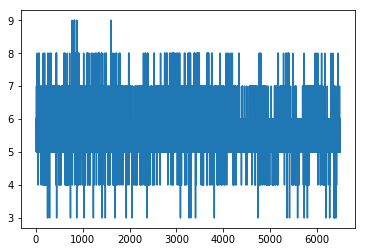

In [9]:
dataset['quality'].plot()  #Plotando gráfico para verificar quantidade dos atributos target. Maioria está entre 5 - 7.

#### Foi escolhido o Random Forest como modelo devido a sua alta capacidade de aprendizado, sua fácil manuseação e alta performance, além da possibilidade de trabalhar com classificações binárias ou multiclasses, como era o caso do dataset. Foi utilizado inicialmente os parâmetros definidos por default. 

In [32]:
x_t_treino, x_t_teste, y_t_treino, y_t_teste = train_test_split(dataset.drop(['quality'], axis=1), dataset['quality'], test_size=0.3, random_state=42)

#Random Forest Classifier
model = RandomForestClassifier()
model.fit(x_t_treino, y_t_treino.ravel())

#Calculando a predição 
print("Score do teste: {:.2f}%".format(model.score(x_t_teste,y_t_teste.ravel()) * 100))

Score do teste: 61.78%


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


#### Para observar o comportamento do RF, foi alterado os parâmetros para 300 árvores e 20 de profundidade. Não foi utilizado GridSearch por conta do grande número de amostras do dataset, visto que dificultaria no processamento do algoritmo. 

In [28]:
x_t_treino, x_t_teste, y_t_treino, y_t_teste = train_test_split(dataset.drop(['quality'], axis=1), dataset['quality'], test_size=0.3, random_state=42)

#Random Forest Classifier
model = RandomForestClassifier(n_estimators = 300, max_depth = 20, random_state=0)
model.fit(x_t_treino, y_t_treino.ravel())

#Calculando a predição 
print("Score do teste: {:.2f}%".format(model.score(x_t_teste,y_t_teste.ravel()) * 100))
print('')

Score do teste: 66.63%



#### Como identificado no gráfico anterior, o aprendizado foi dificultado devido o desbalanceamento de classes. Como pode ser observado na matriz de confusão, quanto mais próximo dos extremos, maior a dificuldade de classificar. 

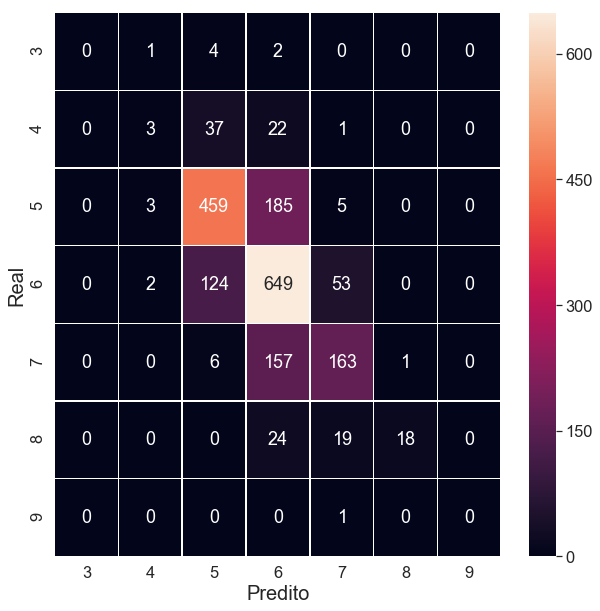

In [29]:
y = np.array(dataset[['quality']])
x = np.array(dataset.drop(['quality'], axis=1))

#Criando a matriz de confusão.
y_t_pred = model.predict(x_t_teste)

cm = confusion_matrix(y_t_teste, y_t_pred)

df_cm = pd.DataFrame(cm, index = [i for i in np.unique(y)],
                        columns = [i for i in np.unique(y)])
plt.figure(figsize = (10,10))
sn.set(font_scale=1.5)
sn.heatmap(df_cm, annot=True, linewidths=.5, linecolor='white', fmt='g')
plt.xlabel('Predito', fontsize=20)
plt.ylabel('Real', fontsize=20)
plt.show()

#### Gráfico para demonstrar a importância de cada atributo durante a classificação.

,importance
feature,
alcohol,0.123
volatile acidity,0.101
density,0.099
total sulfur dioxide,0.090
free sulfur dioxide,0.088
sulphates,0.087
chlorides,0.086
residual sugar,0.085
pH,0.083


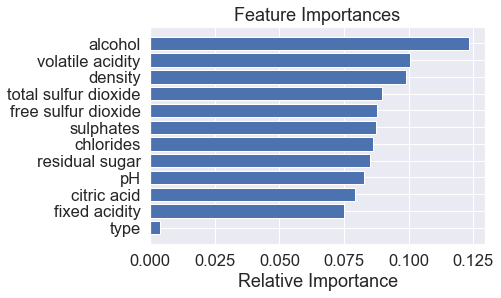

In [18]:
feature = dataset.columns.drop(['quality'])
feature_target = dataset.columns.drop(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'])   #Separando duas variáveis, um
                                                                           #com as colunas e outro com o target

importances = model.feature_importances_
indices = np.argsort(importances)       

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), feature[indices])
plt.xlabel('Relative Importance')

##### Tabela do mesmo gráfico

importances = pd.DataFrame({'feature':x_t_treino.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

importances.head(15)

#### Random Forest não possui tanta necessidade da utilização do Cross Validation devido sua combinação de modelos de Decision Trees, porém foi aplicatido para observar o resultado em relação ao resultado anterior. 

In [22]:
scores = cross_val_score(model, x_t_treino, y_t_treino, cv=10, scoring = "accuracy")

print("Scores:", scores)
print("Média:", scores.mean())
print("Desvio padrão:", scores.std())

C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Scores: [0.65864333 0.72527473 0.69162996 0.67770419 0.67699115 0.6659292
 0.64745011 0.64888889 0.65777778 0.71555556]
Média: 0.6765844888591003
Desvio padrão: 0.02553867538553718


#### Aplicado novamente o aprendizado, mas agora com uma quantidade maior de árvores para verificar se um aumento poderia melhorar o algoritmo. 

In [30]:
#Random Forest Classifier
model = RandomForestClassifier(n_estimators = 1500, max_depth = 20, random_state=0)
model.fit(x_t_treino, y_t_treino.ravel())

#Calculando a predição 
print("Score do teste:: {:.2f}%".format(model.score(x_t_teste,y_t_teste.ravel()) * 100))

Score do teste:: 66.58%


#### Não houve uma melhora no algoritmo, a matriz de confusão mostra que há mudanças quase imperceptíveis na classificação. Não foi aplicado técnicas de pré-processamento como o PCA (Principal Component Analysis) pois as características são essênciais para a classificação do Random Forest, a diminuição de atributos, visto que os dados já não eram favoráveis, apenas atrapalharia ainda mais no aprendizado. Além disso, não foi dividido o dataset para realizar um balanceamento de classes por conta do número muito baixo de cassificações nos extremos, o que ocasionaria num dataset com pouca generalização para o problema inicial. 

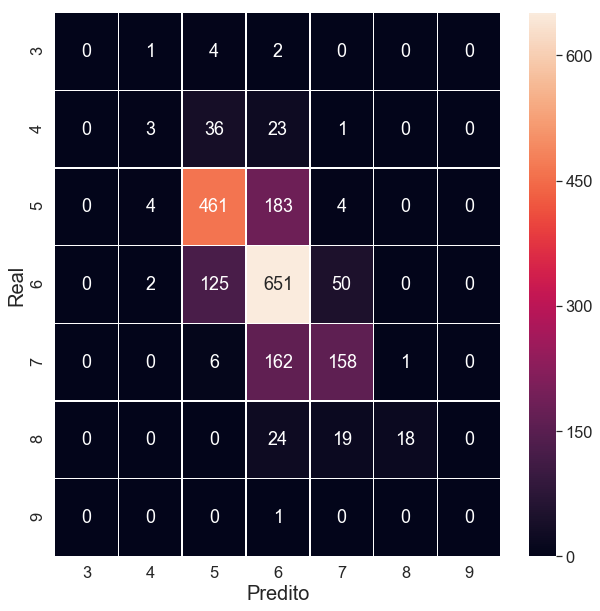

In [31]:
y = np.array(dataset[['quality']])
x = np.array(dataset.drop(['quality'], axis=1))

#Criando a matriz de confusão.
y_t_pred = model.predict(x_t_teste)

cm = confusion_matrix(y_t_teste, y_t_pred)

df_cm = pd.DataFrame(cm, index = [i for i in np.unique(y)],
                        columns = [i for i in np.unique(y)])
plt.figure(figsize = (10,10))
sn.set(font_scale=1.5)
sn.heatmap(df_cm, annot=True, linewidths=.5, linecolor='white', fmt='g')
plt.xlabel('Predito', fontsize=20)
plt.ylabel('Real', fontsize=20)
plt.show()